<a href="https://colab.research.google.com/github/JYEmm-eng/Final-Team9/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%EC%A0%84%EC%B2%98%EB%A6%AC%EC%99%847.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [13]:
df = pd.read_csv("/content/drive/MyDrive/Movie/TMDB_processed_final (1).csv")

In [11]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,genres,production_companies,production_countries,spoken_languages,keywords,director,cast,ROI,SR,y_result
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",415.957978,3,3
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Michael Ca...",325.290428,3,3
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",443.004564,3,3
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",1133.631235,3,3
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",590.370689,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8238,407873,For Colored Girls Who Have Considered Suicide ...,10.000,1,Released,1982-02-23,100000,78,False,1000000,...,"Drama, Romance",Kultur Video,United States of America,English,"broadway show, black woman",Oz Scott,"Sarita Allen, Trazana Beverley, Laurie Carlos,...",-90.000000,0,0
8239,402714,Sming,6.000,1,Released,2014-09-11,89038,105,False,15000000,...,"Drama, Action, Horror",Fast Time Motion Pictures,Thailand,Thai,"tiger, thailand, hunt",Pan Visitsak,"Thanyaboon Boonprasert, Geoffrey Giuliano, Nae...",-99.406413,0,0
8240,384746,Money No Enough,5.000,1,Released,1998-05-07,4100000,98,False,600000,...,Comedy,JSP Films,Singapore,"Mandarin, English","money, debt, financial crisis, financial problem",Tay Teck Lock,"Jack Neo, Mark Lee, Henry Thia, John Cheng, Ji...",583.333333,3,2
8241,25149,Full Grown Men,6.000,1,Released,2006-04-27,13716,78,False,2000000,...,"Comedy, Drama",Grottofilms,United States of America,English,"mermaid, road trip, amusement park, childhood ...",David Munro,"Matt McGrath, Judah Friedlander, Alan Cumming,...",-99.314200,0,0


In [6]:
import pandas as pd

# 감독별 작품 수 세기
director_counts = df['director'].value_counts().reset_index()
director_counts.columns = ['director', 'movie_count']

# 구간 분류 함수 정의
def categorize_count(x):
    if x >= 40:
        return "40편 이상"
    elif x >= 30:
        return "30편 이상"
    elif x >= 20:
        return "20편 이상"
    elif x >= 10:
        return "10편 이상"
    elif x >= 5:
        return "5편 이상"
    else:
        return "5편 미만"

# 카테고리 컬럼 생성
director_counts["category"] = director_counts["movie_count"].apply(categorize_count)

# 카테고리별 감독 수 집계
category_summary = director_counts["category"].value_counts().sort_index()

print(category_summary)

# 필요하다면 DataFrame 확인
print(director_counts.head(20))


category
10편 이상      93
20편 이상       7
30편 이상       2
5편 미만     3215
5편 이상      307
Name: count, dtype: int64
                director  movie_count category
0         Clint Eastwood           36   30편 이상
1       Steven Spielberg           33   30편 이상
2            Woody Allen           29   20편 이상
3       Alfred Hitchcock           27   20편 이상
4           Ridley Scott           26   20편 이상
5        Martin Scorsese           24   20편 이상
6      Steven Soderbergh           23   20편 이상
7             Ron Howard           23   20편 이상
8         Brian De Palma           21   20편 이상
9             Tim Burton           19   10편 이상
10          Oliver Stone           19   10편 이상
11  Francis Ford Coppola           18   10편 이상
12       Robert Zemeckis           18   10편 이상
13       Joel Schumacher           17   10편 이상
14          Renny Harlin           17   10편 이상
15           Walter Hill           16   10편 이상
16        Richard Donner           16   10편 이상
17        John Carpenter           16   10편 

In [8]:
import pandas as pd

# 감독별 평균 평점 계산
director_avg = df.groupby("director")["vote_average"].mean().reset_index()
director_avg.columns = ["director", "avg_vote"]

# 6점 이상 여부 구분
director_avg["rating_group"] = director_avg["avg_vote"].apply(lambda x: "6점 이상" if x >= 6 else "6점 미만")

# 각 그룹별 감독 수 집계
group_summary = director_avg["rating_group"].value_counts()

print("📊 그룹별 감독 수")
print(group_summary)

# 두 그룹 평균 평점 비교
comparison = director_avg.groupby("rating_group")["avg_vote"].mean()
print("\n📊 그룹별 평균 평점")
print(comparison)

# 상위 감독 몇 명 보기
print("\n📋 감독별 평균 평점 상위 10명")
print(director_avg.sort_values("avg_vote", ascending=False).head(10))


📊 그룹별 감독 수
rating_group
6점 이상    2490
6점 미만    1134
Name: count, dtype: int64

📊 그룹별 평균 평점
rating_group
6점 미만    5.317810
6점 이상    6.730164
Name: avg_vote, dtype: float64

📋 감독별 평균 평점 상위 10명
                director  avg_vote rating_group
3581          Yen Ah Moi    10.000        6점 이상
1277        Haseeb Hasan    10.000        6점 이상
2385       Miyuki Fukuda    10.000        6점 이상
2135       Marcos Negrão    10.000        6점 이상
3439      Umair S. Fazli    10.000        6점 이상
609          Coco Martin    10.000        6점 이상
2085         Luther Reed     8.500        6점 이상
1014       Fernando Puig     8.500        6점 이상
2509        Noël Mitrani     8.500        6점 이상
1806  Justin K. Thompson     8.442        6점 이상


[그룹 크기] A=97, B=3527

=== Welch's t-test (감독별 평균 y_result) ===
t = 10.736, p = 0.00000
해석: 유의미한 차이(가설 지지 가능)

=== Mann–Whitney U (강건성 확인) ===
U = 236633.500, p = 0.00000
해석: 유의미한 차이

효과크기 Hedges' g = 0.584  (0.2≈작음, 0.5≈중간, 0.8≈큼)

=== 그룹 요약(감독당 평균 y_result) ===
            group  n_directors  mean_of_mean_y  std_of_mean_y
0  A(10편↑ & 평점≥6)           97        1.441406       0.426330
1          B(그 외)         3527        0.952131       0.846073


/tmp/ipython-input-1467601635.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([A["mean_y"].dropna(), B["mean_y"].dropna()],


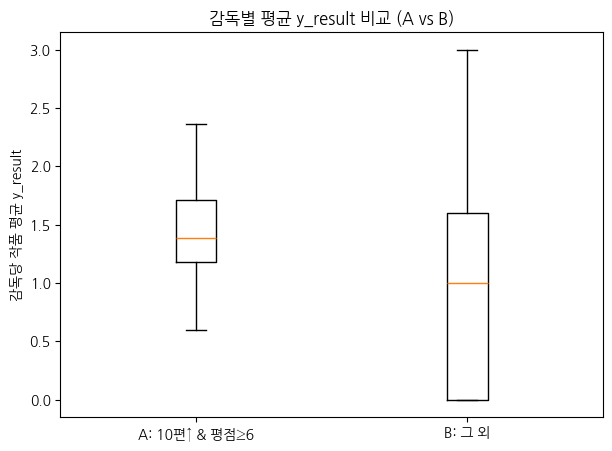

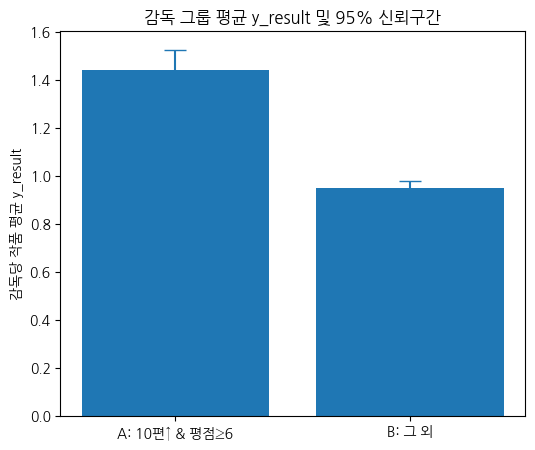

In [12]:

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt

# === 3. 감독 수준 집계: 작품 수, 평균 평점, 평균 y_result ===
director_stats = df.groupby("director").agg(
    total_movies=("title", "count"),
    avg_vote=("vote_average", "mean"),
    mean_y=("y_result", "mean"),       # ★ 핵심 종속변수: 감독당 작품 평균 y_result
    sum_y=("y_result", "sum")          # 참고: 합계(보고만)
).reset_index()

# === 4. 그룹 나누기 ===
A = director_stats[(director_stats["total_movies"] >= 10) & (director_stats["avg_vote"] >= 6)]
B = director_stats.drop(A.index)

print(f"[그룹 크기] A={len(A)}, B={len(B)}")

# 샘플 수가 너무 적으면 해석에 유의
if len(A) < 5 or len(B) < 5:
    print("⚠️ 경고: 한 그룹의 표본이 매우 작습니다. 결과 해석에 주의하세요.")

# === 5. 추론 통계: 평균 차이 검정 ===
# 5-1) Welch의 t-검정
t_stat, p_val = ttest_ind(A["mean_y"], B["mean_y"], equal_var=False, nan_policy="omit")

# 5-2) Mann–Whitney U (강건성 확인)
u_stat, u_p = mannwhitneyu(A["mean_y"], B["mean_y"], alternative="two-sided")

# === 6. 효과크기(Hedges' g) 계산 ===
def hedges_g(x, y):
    x = np.array(x.dropna())
    y = np.array(y.dropna())
    nx, ny = len(x), len(y)
    if nx < 2 or ny < 2:
        return np.nan
    mean_diff = x.mean() - y.mean()
    sx, sy = x.std(ddof=1), y.std(ddof=1)
    # 풀드 표준편차
    sp = np.sqrt(((nx-1)*sx**2 + (ny-1)*sy**2) / (nx+ny-2))
    if sp == 0:
        return np.nan
    d = mean_diff / sp
    # 작은 표본 보정(Hedges' g)
    J = 1 - 3/(4*(nx+ny)-9)
    return J * d

g = hedges_g(A["mean_y"], B["mean_y"])

print("\n=== Welch's t-test (감독별 평균 y_result) ===")
print(f"t = {t_stat:.3f}, p = {p_val:.5f}")
print("해석:", "유의미한 차이(가설 지지 가능)" if p_val < 0.05 else "유의미하지 않음(가설 지지 불가)")

print("\n=== Mann–Whitney U (강건성 확인) ===")
print(f"U = {u_stat:.3f}, p = {u_p:.5f}")
print("해석:", "유의미한 차이" if u_p < 0.05 else "유의미하지 않음")

print(f"\n효과크기 Hedges' g = {g:.3f}  (0.2≈작음, 0.5≈중간, 0.8≈큼)")

# === 7. 요약 테이블 출력 ===
summary = pd.DataFrame({
    "group": ["A(10편↑ & 평점≥6)", "B(그 외)"],
    "n_directors": [len(A), len(B)],
    "mean_of_mean_y": [A["mean_y"].mean(), B["mean_y"].mean()],
    "std_of_mean_y": [A["mean_y"].std(ddof=1), B["mean_y"].std(ddof=1)]
})
print("\n=== 그룹 요약(감독당 평균 y_result) ===")
print(summary)

# === 8. 시각화 ===
# 8-1) 박스플롯(감독당 평균 y_result 비교)
plt.figure(figsize=(7,5))
plt.boxplot([A["mean_y"].dropna(), B["mean_y"].dropna()],
            labels=["A: 10편↑ & 평점≥6", "B: 그 외"])
plt.title("감독별 평균 y_result 비교 (A vs B)")
plt.ylabel("감독당 작품 평균 y_result")
plt.show()

# 8-2) 그룹 평균 막대 + 95% 신뢰구간(부트스트랩)
def bootstrap_ci(data, n_boot=5000, ci=95, seed=42):
    rng = np.random.default_rng(seed)
    data = np.array(data.dropna())
    if len(data) == 0:
        return np.nan, (np.nan, np.nan)
    boots = rng.choice(data, size=(n_boot, len(data)), replace=True).mean(axis=1)
    low = np.percentile(boots, (100-ci)/2)
    high = np.percentile(boots, 100 - (100-ci)/2)
    return boots.mean(), (low, high)

mean_A, (low_A, high_A) = bootstrap_ci(A["mean_y"])
mean_B, (low_B, high_B) = bootstrap_ci(B["mean_y"])

plt.figure(figsize=(6,5))
x = np.arange(2)
means = [mean_A, mean_B]
cis_low = [mean_A - low_A, mean_B - low_B]
cis_high = [high_A - mean_A, high_B - mean_B]
# errorbar는 (yerr)로 [아래, 위] 오차를 줄 수 있습니다.
plt.bar(x, means)
plt.errorbar(x, means, yerr=[cis_low, cis_high], fmt='none', capsize=8)
plt.xticks(x, ["A: 10편↑ & 평점≥6", "B: 그 외"])
plt.ylabel("감독당 작품 평균 y_result")
plt.title("감독 그룹 평균 y_result 및 95% 신뢰구간")
plt.show()


In [4]:
director_counts

,director,movie_count
0,Clint Eastwood,36
1,Steven Spielberg,33
2,Woody Allen,29
3,Alfred Hitchcock,27
4,Ridley Scott,26
...,...,...
3619,Miyuki Fukuda,1
3620,Sun Haipeng,1
3621,Leonid Rybakov,1
3622,Umair S. Fazli,1
